# Imports

In [1]:
import pandas as pd
import psycopg2

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Read Data Set

In [2]:
df = pd.read_csv("mergeData.csv")
df.head()

,speed_total_mean,steering_total_mean,brake_total_mean,throttle_total_mean,acceleration_total_mean,speed_total_var,steering_total_var,brake_total_var,throttle_total_var,acceleration_total_var,total_time,distancePed,max_speed,hadCollision
0,5.919151,0.503649,0.965743,0.820576,0.030731,13.796202,0.000655,0.014468,0.028719,0.039370,15.405173,89.992450,11.669766,0
1,7.580378,0.499771,0.891302,0.878839,-0.026652,31.451253,0.000345,0.058767,0.010391,0.063480,11.412381,85.063860,13.499710,0
2,9.474048,0.494557,0.952182,0.781126,0.006292,53.873833,0.001231,0.022506,0.045416,0.106281,102.356492,789.212800,25.851397,1
3,3.398595,0.523305,0.960227,0.858795,0.027363,5.036717,0.000101,0.018643,0.075860,0.027735,14.315100,47.977978,10.266865,0
4,11.669419,0.500661,0.891913,0.522365,0.008028,47.209285,0.000396,0.055982,0.112551,0.159198,7.505478,88.011610,20.055070,0


### Distribution

In [3]:
num_obs = len(df)
num_true = len(df.loc[df['hadCollision'] == 1])
num_false = len(df.loc[df['hadCollision'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  61 (9.31%)
Number of False cases: 594 (90.69%)


## Split data set

In [4]:
from sklearn.model_selection import train_test_split

data = df.copy()
X = data.drop('hadCollision', axis=1) 
Y = data['hadCollision']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

## KNN classifier (n = 3)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
#check accuracy of our model on the test data
from sklearn import metrics

print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.9007633587786259
Confusion Matrix
[[117   2]
 [ 11   1]]

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.98      0.95       119
          1       0.33      0.08      0.13        12

avg / total       0.86      0.90      0.87       131



Baja certeza para casos verdaderos de choque

## KNN classifier (n = 5)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.9083969465648855
Confusion Matrix
[[119   0]
 [ 12   0]]

Classification Report
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       119
          1       0.00      0.00      0.00        12

avg / total       0.83      0.91      0.86       131



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Nula certeza para casos verdaderos de choque

## KNN classifier (n = 7)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [10]:
print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.9007633587786259
Confusion Matrix
[[118   1]
 [ 12   0]]

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.99      0.95       119
          1       0.00      0.00      0.00        12

avg / total       0.82      0.90      0.86       131



## KNN classifier (n = 11)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 11)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [12]:
print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.9083969465648855
Confusion Matrix
[[119   0]
 [ 12   0]]

Classification Report
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       119
          1       0.00      0.00      0.00        12

avg / total       0.83      0.91      0.86       131



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## KNN with cv score

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, Y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.91666667 0.90839695 0.91603053 0.91603053 0.90769231]
cv_scores mean:0.9129633979252301


## GridSearchCV n neighbors

In [14]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 2}

In [16]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.917557251908397

## KNN classifier (n = 2)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [18]:
print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.9083969465648855
Confusion Matrix
[[118   1]
 [ 11   1]]

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.99      0.95       119
          1       0.50      0.08      0.14        12

avg / total       0.88      0.91      0.88       131



Resultados parecidos a n = 3

## Decision Tree

In [26]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Defining and fitting a DecisionTreeClassifier instance
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

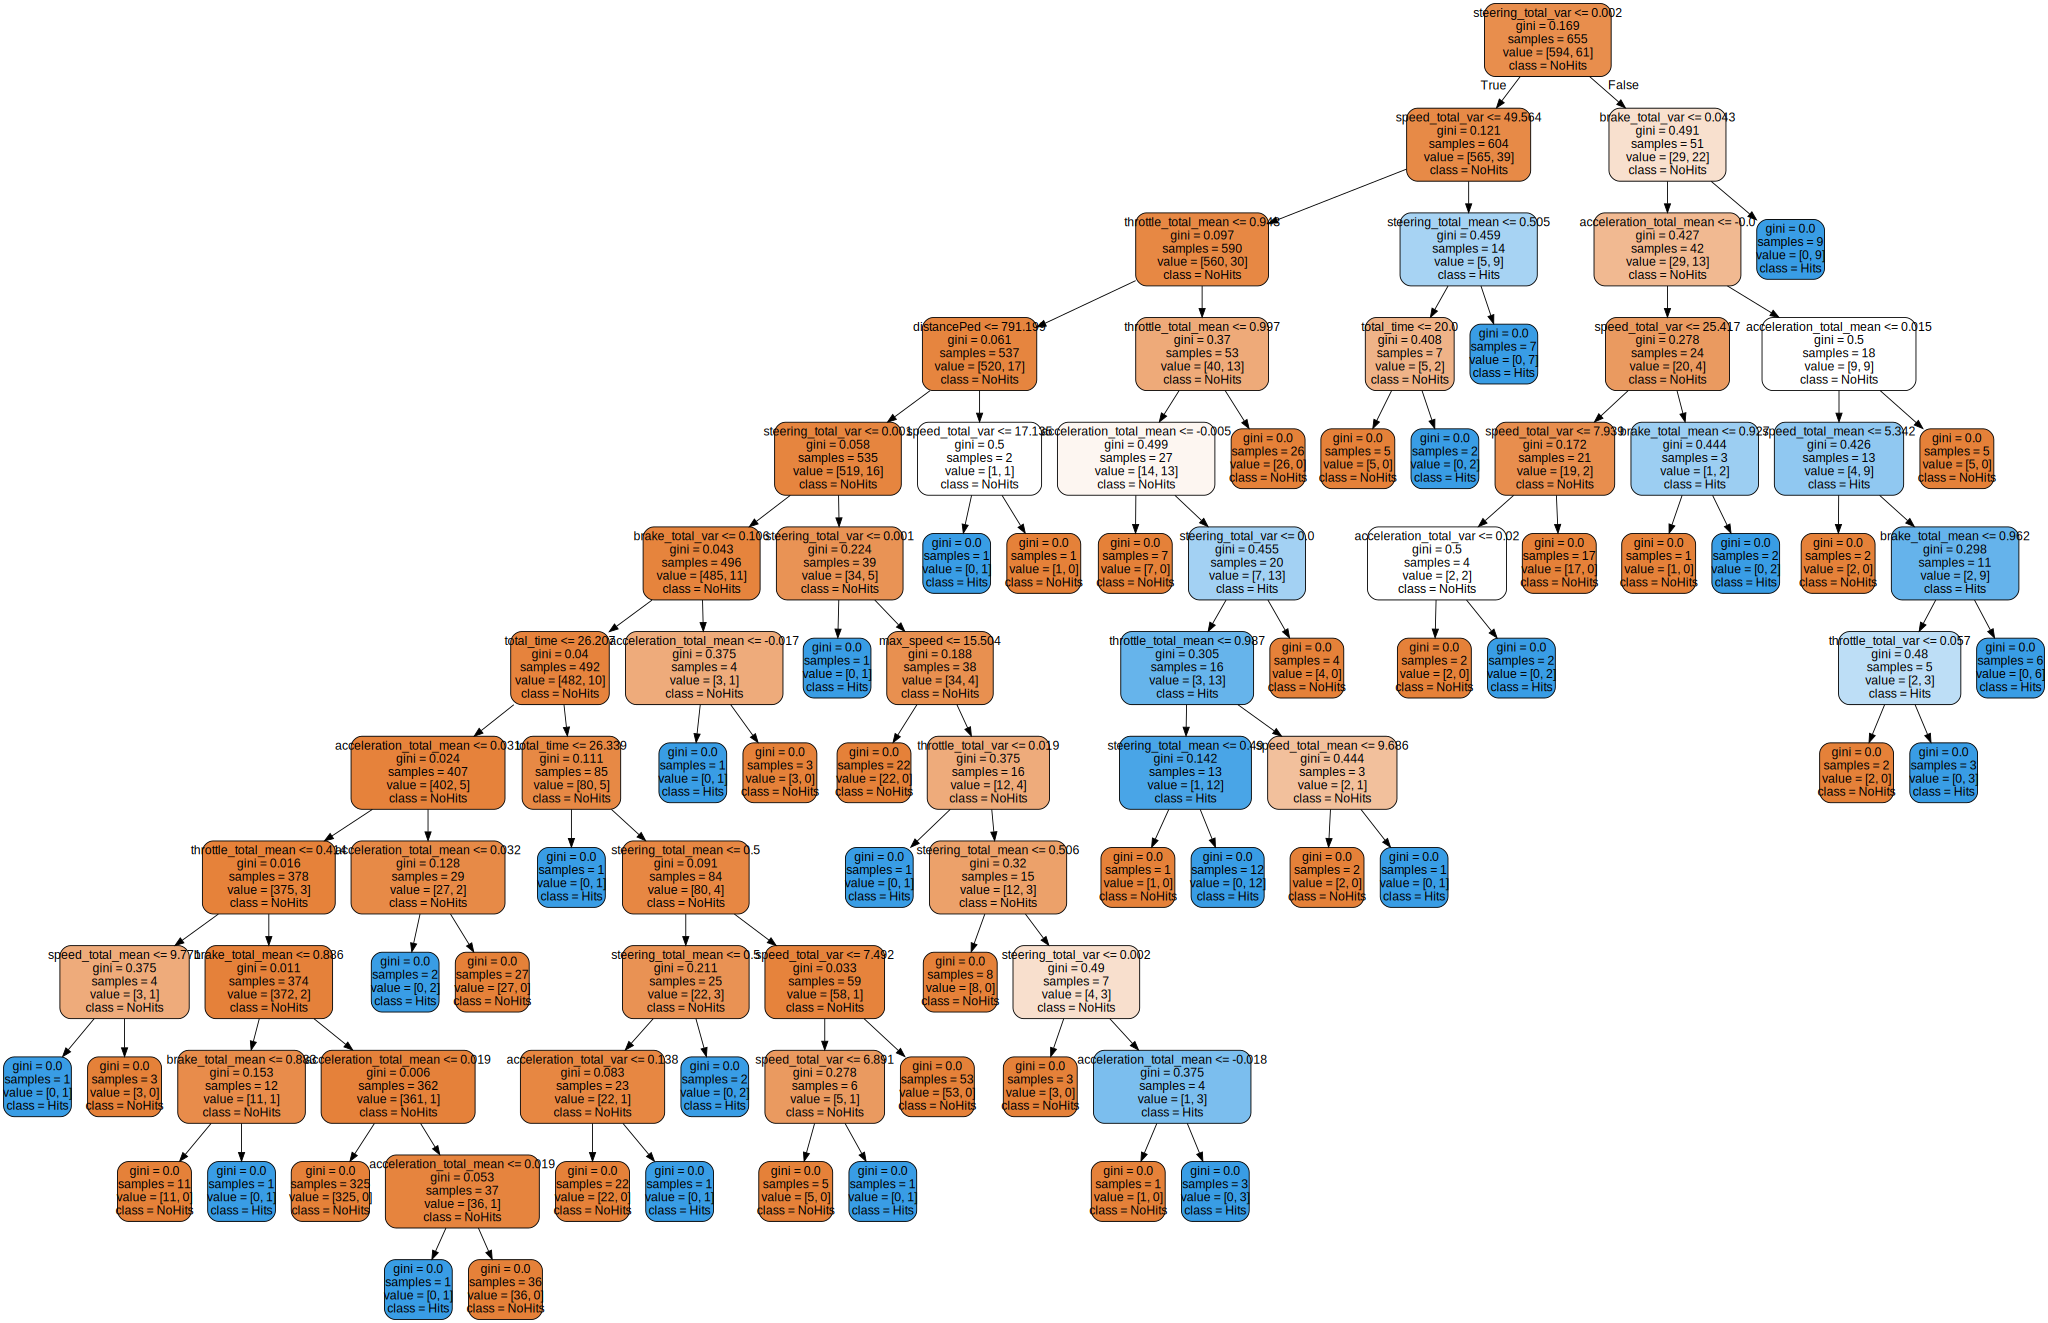

In [28]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf, out_file="mytree.dot",
                feature_names = list(X.columns),
                class_names = ["NoHits", "Hits"],
                filled = True,
                rounded = True)

with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

speed_total_mean 0.02047877606744969
steering_total_mean 0.11324223519136763
brake_total_mean 0.039379373695694525
throttle_total_mean 0.11490885594059995
acceleration_total_mean 0.18615273302981572
speed_total_var 0.11904573030555696
steering_total_var 0.19144889058797998
brake_total_var 0.06766044548136804
throttle_total_var 0.021692333167743008
acceleration_total_var 0.04018845299434515
total_time 0.06737676007089455
distancePed 0.007959814131870269
max_speed 0.010465599335314602


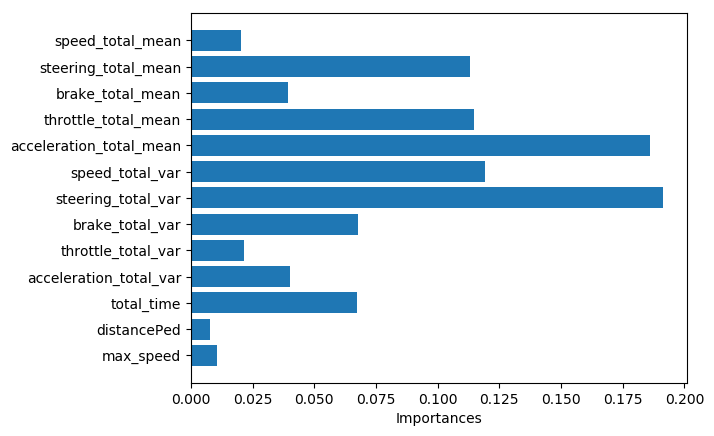

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X, Y)

for name, importance in zip(X.columns, classifier.feature_importances_):
    print(name, importance)
    
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

ax.barh(X.columns, classifier.feature_importances_, align='center')
ax.set_yticks(X.columns)
ax.set_yticklabels(X.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importances')

plt.show()

### With max depth and min samples per leaf

In [33]:
treeMaxDepth = DecisionTreeClassifier( max_depth=3, min_samples_leaf=5, random_state=100)
treeMaxDepth = treeMaxDepth.fit(X, Y)

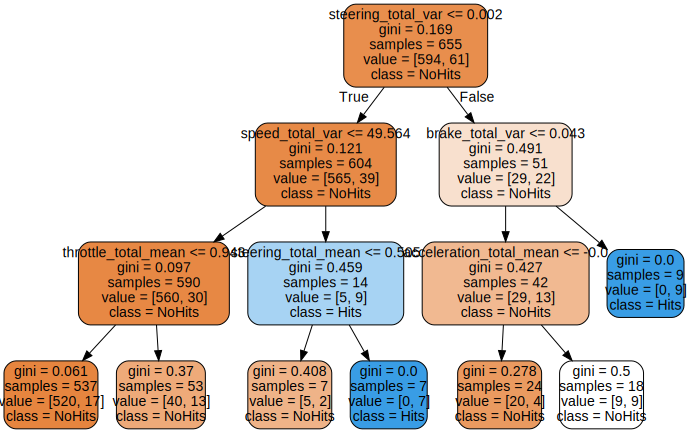

In [34]:
export_graphviz(treeMaxDepth, out_file="mytree2.dot",
                feature_names = list(X.columns),
                class_names = ["NoHits", "Hits"],
                filled = True,
                rounded = True)

with open("mytree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Predictions

In [36]:
from sklearn.metrics import accuracy_score 


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

0.916030534351145
Confusion Matrix
[[114   5]
 [  6   6]]

Classification Report
             precision    recall  f1-score   support

          0       0.95      0.96      0.95       119
          1       0.55      0.50      0.52        12

avg / total       0.91      0.92      0.91       131



Mejoró un poco en el recall pero poca precisión

#### With max depth and min samples per leaf

In [39]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

0.9083969465648855
Confusion Matrix
[[117   2]
 [ 10   2]]

Classification Report
             precision    recall  f1-score   support

          0       0.92      0.98      0.95       119
          1       0.50      0.17      0.25        12

avg / total       0.88      0.91      0.89       131



#### With entropy

In [38]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

0.916030534351145
Confusion Matrix
[[116   3]
 [  8   4]]

Classification Report
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       119
          1       0.57      0.33      0.42        12

avg / total       0.90      0.92      0.91       131



## Random forest

### Re-Distribution

In [68]:
num_obs = len(df)
num_true = len(df.loc[df['hadCollision'] == 1])
num_false = len(df.loc[df['hadCollision'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  61 (9.31%)
Number of False cases: 594 (90.69%)


In [69]:
positives = df.loc[df['hadCollision'] == 1].copy()
negatives = df.loc[df['hadCollision'] == 0].copy()

In [70]:
X_train_pos, X_test_pos = train_test_split(positives, train_size=40, random_state=1)
X_train_neg, X_test_neg = train_test_split(negatives, train_size=40, random_state=1)
X_train_total = X_train_pos.append(X_train_neg)
X_test_total = X_test_pos.append(X_test_neg)

X_train_total = X_train.sample(frac=1).reset_index(drop=True)
X_test_total = X_test.sample(frac=1).reset_index(drop=True)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [71]:
X_train_total.shape

(80, 14)

In [72]:
X_test_total.shape

(575, 14)

40 and 40 cases from each class to train, and the rest to test

In [73]:
X_train = X_train_total.drop('hadCollision', axis=1) 
y_train = X_train_total['hadCollision']

X_test = X_test_total.drop('hadCollision', axis=1) 
y_test = X_test_total['hadCollision']

In [74]:
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Training True  : 40 (50.00%)
Training False : 40 (50.00%)

Test True      : 21 (3.65%)
Test False     : 554 (96.35%)


**Esto es lo que habiamos hablado en la última reunion**

## Random Forest Apply

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [76]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9750


### Predict Test Data

In [80]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7617


In [81]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[422 132]
 [  5  16]]

Classification Report
             precision    recall  f1-score   support

          0       0.99      0.76      0.86       554
          1       0.11      0.76      0.19        21

avg / total       0.96      0.76      0.84       575



Mejoró mucho el recall pero bajó la precisión en los verdaderos.